In [1]:
import pylab as plt
import math
plt.rcParams.update({'font.size': 14})
plt.rcParams['svg.fonttype'] = 'none'
import numpy as np
import pandas as pd

In [ ]:
# K = mean peak k values, L = 1-10

In [2]:
import numpy as np
ls = np.linspace(1, 10, num=40) 
#ks = np.linspace(1, 8, num=40)
k_path = f"//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/brainplots/k_values/peak_ks_subject_19.csv"
k_shape = pd.read_csv(k_path, sep=',', header=0)
k_shape = k_shape.values.flatten()
print(k_shape.shape)
mean_k = np.mean(k_shape)
k = mean_k
print(k)
print(k.shape)
ks = [k]
n_sub = 1
n_seed = 5

dfa_KL_one = np.zeros((n_sub, len(ks), len(ls), 200))
order_KL_one = np.zeros((n_sub, len(ks), len(ls)))
plv_KL_one = np.zeros((n_sub, len(ks), len(ls)))

clinical_ids = np.load('//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/clinical_ids.npy')
print(clinical_ids)
for i, n in enumerate(clinical_ids[:n_sub]):
    for ki, k in enumerate(ks):
        for li, l in enumerate(ls):
            avg_order = []
            avg_dfa = []
            avg_plv = []
            
            for seed in range(n_seed):
                order = np.load(f"//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/different_subjects/k_l/sub-{n}/log_K-{k}_L-{l}_fr1.0_ex0.6666666666666666_order_seed{seed}.npy")
                dfa_m = np.load(f"//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/different_subjects/k_l/sub-{n}/log_K-{k}_L-{l}_fr1.0_ex0.6666666666666666_dfa_seed{seed}.npy")
                plv_m = np.load(f"//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/different_subjects/k_l/sub-{n}/log_K-{k}_L-{l}_fr1.0_ex0.6666666666666666_plv_seed{seed}.npy")

                avg_order.append(order)
                avg_dfa.append(dfa_m)
                avg_plv.append(plv_m)

            avg_order = np.mean(avg_order)
            avg_dfa = np.mean(avg_dfa, axis=0)
            avg_plv = np.mean(avg_plv)

            order_KL_one[i][ki][li] = avg_order
            dfa_KL_one[i][ki][li] = avg_dfa
            plv_KL_one[i][ki][li] = avg_plv


(200,)
4.995384615384616
()
['248']


In [4]:
print(dfa_KL_one.shape)
print(order_KL_one.shape)
print(plv_KL_one.shape)


(1, 1, 40, 200)
(1, 1, 40)
(1, 1, 40)


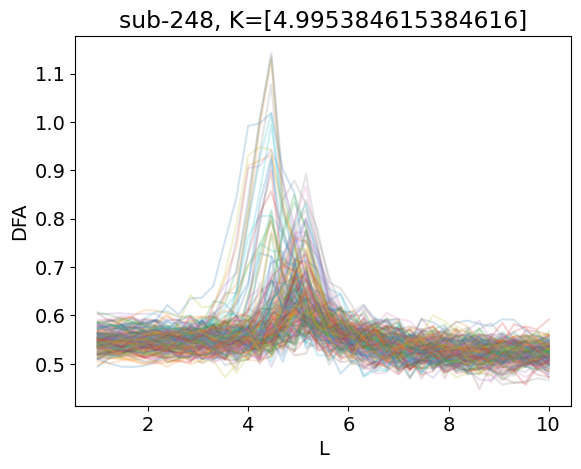

In [5]:
subject_index = 0
K_index = 0

plt.plot(ls, dfa_KL_one[subject_index, K_index, :, 0:200], alpha=0.2)
plt.xlabel('L')
plt.ylabel('DFA')
plt.title(f'sub-{clinical_ids[subject_index]}, K={ks}')

plt.show()


In [ ]:
# K = peak k values, L = 1-10

In [6]:
import numpy as np
ls = np.linspace(1, 10, num=40) 
#ks = np.linspace(1, 8, num=40)
n_sub = 1
n_seed = 5

k_path = f"//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/brainplots/k_values/peak_ks_subject_19.csv"
k_shape = pd.read_csv(k_path, sep=',', header=0)
k_shape = k_shape.values.flatten()
print(k_shape.shape)
k = k_shape / mean_k
print(k.shape)
ks = [k]

dfa_KL_peak = np.zeros((n_sub, len(ks), len(ls), 200))
order_KL_peak = np.zeros((n_sub, len(ks), len(ls)))
plv_KL_peak = np.zeros((n_sub, len(ks), len(ls)))

clinical_ids = np.load('//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/clinical_ids.npy')
print(clinical_ids)
for i, n in enumerate(clinical_ids[:n_sub]):
    for ki, k in enumerate(ks):
        for li, l in enumerate(ls):
            avg_order = []
            avg_dfa = []
            avg_plv = []
            
            for seed in range(n_seed):
                order = np.load(f"//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/different_subjects/k_l/peak_k/sub-{n}/log_K-k_peak_values_L-{l}_fr1.0_ex0.6666666666666666_order_seed{seed}.npy")
                dfa_m = np.load(f"//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/different_subjects/k_l/peak_k/sub-{n}/log_K-k_peak_values_L-{l}_fr1.0_ex0.6666666666666666_dfa_seed{seed}.npy")
                plv_m = np.load(f"//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/different_subjects/k_l/peak_k/sub-{n}/log_K-k_peak_values_L-{l}_fr1.0_ex0.6666666666666666_plv_seed{seed}.npy")

                avg_order.append(order)
                avg_dfa.append(dfa_m)
                avg_plv.append(plv_m)

            avg_order = np.mean(avg_order)
            avg_dfa = np.mean(avg_dfa, axis=0)
            avg_plv = np.mean(avg_plv)

            order_KL_peak[i][ki][li] = avg_order
            dfa_KL_peak[i][ki][li] = avg_dfa
            plv_KL_peak[i][ki][li] = avg_plv


(200,)
(200,)
['248']


In [7]:
print(dfa_KL_peak.shape)
print(order_KL_peak.shape)
print(plv_KL_peak.shape)


(1, 1, 40, 200)
(1, 1, 40)
(1, 1, 40)


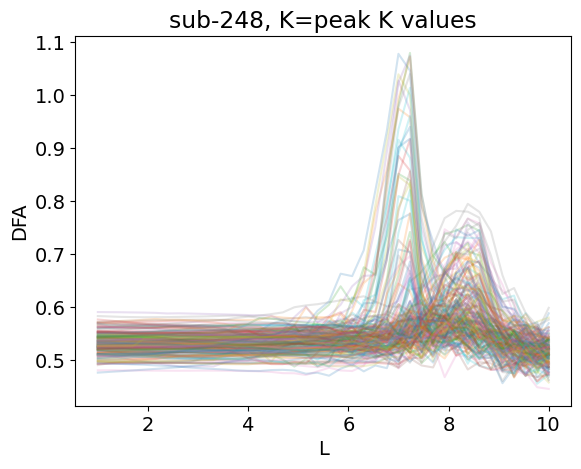

In [8]:
subject_index = 0
K_index = 0

plt.plot(ls, dfa_KL_peak[subject_index, K_index, :, 0:200], alpha=0.2)
plt.xlabel('L')
plt.ylabel('DFA')
plt.title(f'sub-{clinical_ids[subject_index]}, K={"peak K values"}')

plt.show()


In [ ]:
# K = mean peak k values, L = 5

In [21]:
import numpy as np
import hashlib
import sys

ls = [5]
ks = np.linspace(1, 8, num=40)

n_subjs = 1

for s_i in range(40):  # Iterate over the range of indices
    subj_idx, l_idx, k_idx = np.unravel_index(s_i, (n_subjs, len(ls), len(ks)))
    print("Subject index:", subj_idx)
    print("L index:", l_idx)
    print("K index:", k_idx)

#s_i = 0
#subj_idx, l_idx, k_idx = np.unravel_index(s_i, ( n_subjs, len(ls), len(ks)))
#k_idx = np.unravel_index(s_i, (len(ks)))

n_sub = 1
n_seed = 5

dfa_KL_peaks = np.zeros((n_sub, len(ks), len(ls), 200))
order_KL_peaks = np.zeros((n_sub, len(ks), len(ls)))
plv_KL_peaks = np.zeros((n_sub, len(ks), len(ls)))

clinical_ids = np.load('//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/clinical_ids.npy')
print(clinical_ids)
for i, n in enumerate(clinical_ids[:n_sub]):
    for ki, k in enumerate(ks):
        for li, l in enumerate(ls):
            avg_order = []
            avg_dfa = []
            avg_plv = []
            
            for seed in range(n_seed):
                order = np.load(f"//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/different_subjects/k_l/test/sub-{n}/log_K-{ks[k_idx]}_L-{l}_fr1.0_ex0.6666666666666666_order_seed{seed}.npy")
                dfa_m = np.load(f"//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/different_subjects/k_l/test/sub-{n}/log_K-{ks[k_idx]}_L-{l}_fr1.0_ex0.6666666666666666_dfa_seed{seed}.npy")
                plv_m = np.load(f"//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/different_subjects/k_l/test/sub-{n}/log_K-{ks[k_idx]}_L-{l}_fr1.0_ex0.6666666666666666_plv_seed{seed}.npy")

                avg_order.append(order)
                avg_dfa.append(dfa_m)
                avg_plv.append(plv_m)

            avg_order = np.mean(avg_order)
            avg_dfa = np.mean(avg_dfa, axis=0)
            avg_plv = np.mean(avg_plv)

            order_KL_peaks[i][ki][li] = avg_order
            dfa_KL_peaks[i][ki][li] = avg_dfa
            plv_KL_peaks[i][ki][li] = avg_plv


['248']


In [28]:
import numpy as np
import hashlib
import sys

ls = [5]
ks = np.linspace(1, 8, num=40)

n_subjs = 1

for s_i in range(40):  # Iterate over the range of indices
    subj_idx, l_idx, k_idx = np.unravel_index(s_i, (n_subjs, len(ls), len(ks)))
    print("Subject index:", subj_idx)
    print("L index:", l_idx)
    print("K index:", k_idx)

#s_i = 0
#subj_idx, l_idx, k_idx = np.unravel_index(s_i, ( n_subjs, len(ls), len(ks)))
#k_idx = np.unravel_index(s_i, (len(ks)))

n_sub = 1
n_seed = 5

dfa_KL_peaks = np.zeros((n_sub, len(ks), len(ls), 200))
order_KL_peaks = np.zeros((n_sub, len(ks), len(ls)))
plv_KL_peaks = np.zeros((n_sub, len(ks), len(ls)))

clinical_ids = np.load('//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/clinical_ids.npy')

for i, n in enumerate(clinical_ids[:n_sub]):
    for ki, k in enumerate(ks):
        for li, l in enumerate(ls):
            avg_order = []
            avg_dfa = []
            avg_plv = []
            
            for seed in range(n_seed):
                order = np.load(f"//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/different_subjects/k_l/test/sub-{n}/log_K-{k}_L-{l}_fr1.0_ex0.6666666666666666_order_seed{seed}.npy")
                dfa_m = np.load(f"//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/different_subjects/k_l/test/sub-{n}/log_K-{k}_L-{l}_fr1.0_ex0.6666666666666666_dfa_seed{seed}.npy")
                plv_m = np.load(f"//lgw01.triton.aalto.fi/scratch/nbe/leap_mcpsych/Samanta/kuramoto/different_subjects/k_l/test/sub-{n}/log_K-{k}_L-{l}_fr1.0_ex0.6666666666666666_plv_seed{seed}.npy")

                avg_order.append(order)
                avg_dfa.append(dfa_m)
                avg_plv.append(plv_m)

            avg_order = np.mean(avg_order)
            avg_dfa = np.mean(avg_dfa, axis=0)
            avg_plv = np.mean(avg_plv)

            order_KL_peaks[i][ki][li] = avg_order
            dfa_KL_peaks[i][ki][li] = avg_dfa
            plv_KL_peaks[i][ki][li] = avg_plv


Subject index: 0
L index: 0
K index: 0
Subject index: 0
L index: 0
K index: 1
Subject index: 0
L index: 0
K index: 2
Subject index: 0
L index: 0
K index: 3
Subject index: 0
L index: 0
K index: 4
Subject index: 0
L index: 0
K index: 5
Subject index: 0
L index: 0
K index: 6
Subject index: 0
L index: 0
K index: 7
Subject index: 0
L index: 0
K index: 8
Subject index: 0
L index: 0
K index: 9
Subject index: 0
L index: 0
K index: 10
Subject index: 0
L index: 0
K index: 11
Subject index: 0
L index: 0
K index: 12
Subject index: 0
L index: 0
K index: 13
Subject index: 0
L index: 0
K index: 14
Subject index: 0
L index: 0
K index: 15
Subject index: 0
L index: 0
K index: 16
Subject index: 0
L index: 0
K index: 17
Subject index: 0
L index: 0
K index: 18
Subject index: 0
L index: 0
K index: 19
Subject index: 0
L index: 0
K index: 20
Subject index: 0
L index: 0
K index: 21
Subject index: 0
L index: 0
K index: 22
Subject index: 0
L index: 0
K index: 23
Subject index: 0
L index: 0
K index: 24
Subject in

In [29]:
print(dfa_KL_peaks.shape)
print(order_KL_peaks.shape)
print(plv_KL_peaks.shape)


(1, 40, 1, 200)
(1, 40, 1)
(1, 40, 1)


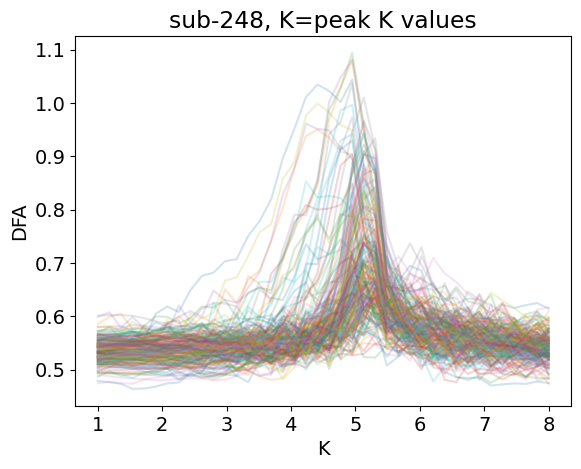

In [30]:
subject_index = 0
L_index = 0

plt.plot(ks, dfa_KL_peaks[subject_index, :, L_index, 0:200], alpha=0.2)
plt.xlabel('K')
plt.ylabel('DFA')
plt.title(f'sub-{clinical_ids[subject_index]}, K={"peak K values"}')

plt.show()


In [ ]:
# Plot with mean + sd lines

C:\Users\knapics1\AppData\Local\Temp\ipykernel_21064\6221479.py:57: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), label='Peak K Value')


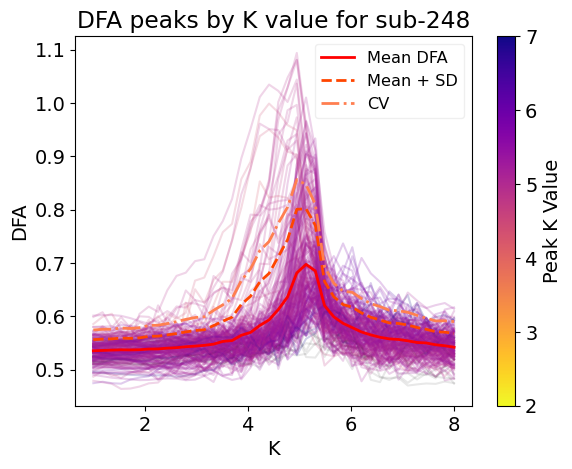

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

subject_index = 0
subject_data = dfa_KL_peaks[subject_index, :, 0, 0:200]  # Assuming 200 parcels
threshold = 0.60  # Define your threshold value here

# Find the maximum DFA value and its corresponding K index for each parcel
max_dfa_indices = np.argmax(subject_data, axis=0)
peak_ks = ks[max_dfa_indices]
max_dfa_values = np.max(subject_data, axis=0)

# Filter peak K values based on the threshold
filtered_peak_ks = peak_ks[max_dfa_values > threshold]
filtered_max_dfa_values = max_dfa_values[max_dfa_values > threshold]

# Define colormap and normalization based on the maximum and minimum peak K values
cmap = plt.cm.plasma_r
norm = Normalize(vmin=2, vmax=7) 

# Plotting loop
for parcel_index in range(subject_data.shape[1]):
    peak_k = peak_ks[parcel_index]
    peak_dfa = max_dfa_values[parcel_index]
    if peak_dfa >= threshold:
        plt.plot(ks, subject_data[:, parcel_index], color=cmap(norm(peak_k)), alpha=0.2)  # Use normalized K value for color
    else:
        plt.plot(ks, subject_data[:, parcel_index], color='black', alpha=0.09)  # Plot in gray if peak DFA is below threshold

# Plot mean DFA and mean + SD
mean_dfa_across_parcels = np.mean(dfa_KL_peaks[:, :, :, 0:200], axis=(2, 3))
mean_dfa = mean_dfa_across_parcels[subject_index]
std_dfa = np.std(subject_data, axis=1)
cv_dfa = std_dfa / mean_dfa  # Coefficient of variation

plt.plot(ks, mean_dfa, label='Mean DFA', color='red', linewidth=2)
plt.plot(ks, mean_dfa + std_dfa, linestyle='--', label='Mean + SD', color='orangered', linewidth=2)
plt.plot(ks, mean_dfa + cv_dfa, linestyle='-.', label='CV', color='coral', linewidth=2)  # Plotting CV instead of Fano factor


#mean_dfa_across_parcels_shuffled = np.mean(dfa_KL_shuffled[:, :, :, 0:200], axis=(2, 3))
#mean_dfa_shuffled = mean_dfa_across_parcels_shuffled[subject_index]
#std_dfa_shuffled = np.std(dfa_KL_shuffled[subject_index, :, L_index, 0:200], axis=1)
#plt.plot(ks, mean_dfa_shuffled, label='Mean DFA shuffled', color='dodgerblue', linewidth=2)
#plt.plot(ks, mean_dfa_shuffled + std_dfa_shuffled, linestyle='--', label='Mean + SD shuffled', color='deepskyblue',linewidth=2)

#mean_dfa_across_parcels_homo = np.mean(dfa_KL_homo[:, :, :, 0:200], axis=(2, 3))
#mean_dfa_homo = mean_dfa_across_parcels_homo[0]
#std_dfa_homo = np.std(dfa_KL_homo[0, :, L_index, 0:200], axis=1)
#plt.plot(ks, mean_dfa_homo, label='Mean DFA homogenous', color='limegreen', linewidth=2)
#plt.plot(ks, mean_dfa_homo + std_dfa_homo, linestyle='--', label='Mean + SD homogenous', color='palegreen',linewidth=2)

plt.xlabel('K')  
plt.ylabel('DFA')
plt.title(f'DFA peaks by K value for sub-{clinical_ids[subject_index]}')
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), label='Peak K Value')
#plt.legend(fontsize='x-small')
legend=plt.legend(fontsize='small')
legend.get_frame().set_alpha(0.3)
plt.show()


In [ ]:
# Saving the peak k values

In [38]:
pwd

'c:\\Users\\knapics1\\AppData\\Local\\Programs\\Microsoft VS Code'

In [39]:
cd //home.org.aalto.fi/knapics1/data/Desktop/Courses/Thesis/brainplots/K_peak_values

\\home.org.aalto.fi\knapics1\data\Desktop\Courses\Thesis\brainplots\K_peak_values


In [2]:
import numpy as np
import pandas as pd

# PEAK K ADJUSTED DATA: dfa_KL_orig = np.load('/m/nbe/scratch/leap_mcpsych/Samanta/kuramoto/all_subjects_array/peak_k/dfa_KL_orig.npy')
# RAW DFA DATA: dfa_KL_orig = np.load('all_subjects_array/dfa_KL_orig.npy')
dfa_KL_orig = np.load('/m/nbe/scratch/leap_mcpsych/Aleksi/master_thesis/all_subjects_array/dfa_KL_orig.npy')
print(dfa_KL_orig.shape)

ls = [5]
ks = np.linspace(1, 8, num=40)
n_sub = 230
n_seed = 5

# Iterate over each subject
for subject_index in range(n_sub):
    peak_ks_subject = []
    
    subject_data = dfa_KL_orig[subject_index, :, 0, 0:200]  # Assuming 200 parcels
    threshold = 0.65  # Define your threshold value here

    # Find the maximum DFA value and its corresponding K index for each parcel
    max_dfa_indices = np.argmax(subject_data, axis=0)
    peak_ks = ks[max_dfa_indices]
    max_dfa_values = np.max(subject_data, axis=0)
    
    # Set peak K values to 0 for parcels with DFA values below threshold
    peak_ks[max_dfa_values < threshold] = 0
    
    # Append peak K values to the list for the current subject
    peak_ks_subject.append(peak_ks)
    
    # Convert the list to a numpy array and flatten it
    peak_ks_subject = np.array(peak_ks_subject).flatten()
    
    # Save the peak K values for the current subject to a NumPy file
    np.save(f'peak_ks_raw_array_230/peak_ks_subject_{subject_index}.npy', peak_ks_subject)
    
    # Save the peak K values as a CSV file
    df = pd.DataFrame({'peak_ks': peak_ks_subject})
    df.to_csv(f'peak_ks_raw_array_230/peak_ks_subject_{subject_index}.csv', index=False)


(230, 40, 1, 200)
